## Problem Statement
- Build a regression model
- Check the regression metrics

#### Load Python libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# data = pd.read_csv("boston_housing_price_dataset.csv")
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    boston = datasets.load_boston()

In [ ]:
print(boston.DESCR)

#### Check Your Data

In [ ]:
# print features names of data
print(f'Feature names\n================\n{boston.feature_names}\n\n')

print(f'Data\n=========')
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['PRICE'] = boston.target
with pd.option_context('expand_frame_repr', False):
    print(data.head(5))
    
print(f'\n====== Shape of Data =======\n\nRows : {data.shape[0]}\nColumns {data.shape[1]}')

In [ ]:
data.info()


In [ ]:
data.describe()

### Exploratory Data Analysis

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(data['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

We can see from the plot that the values of PRICE are distributed normally with few outliers. Most of the house are around 20–24 range (in $1000 scale)

### Correlation between features and target variable

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

### Inference
- The prices increase as the value of RM increases linearly. RM has strong positive positive correlation
- The prices tend to decrease with an increase in LSTAT. So, LSTAT has high negative correlation

### Train Test Split

In [ ]:
data_array = data.values

In [ ]:
# split data into train and test 
X = data_array[:,0:13]
y = data_array[:,13]
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
# define LinearRegression model and train it.
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# predict the output using test data
predictions = model.predict(X_test)
print(f'\nPredicted Output\n===================\n{predictions}')
print(predictions)

# Print True data
print(f'\nGround Truth\n===================\n{y_test}')

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted House Prices ($1000)')
plt.xticks(range(0, int(max(y_test)), 2))
plt.yticks(range(0, int(max(y_test)), 2))
#plt.plot(range(0, int(max(y_test)), 2), range(0, int(max(y_test)), 2), '--k')
plt.title("Actual Prices vs Predicted Prices")

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2: ', round(model.score(X_test, y_test), 2))

#### Considering the RMSE: we can conclude that this model average error is RMSE at 'price', which means RMSE *1000 in money

#### Regression Coefficient

In [ ]:
# regression coefficients 
# regression coefficients 
zip_data = zip(boston.feature_names, model.coef_)
output_data = list(zip_data)
coefficients = pd.DataFrame(output_data, columns=['feature', 'coefficient'])
#coefficients.columns = ['coefficients']
print(coefficients)


In [ ]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))

### Vistualize a staright line
 - y = 3x
 - for one unit increase in x, there is a 3 unit increase in y
 - x = [1, 2, 3, 4, 5, 6]
 - y = [3, 6, 9, 12, 15, 18]
 
### Infernce : Boston Data 
- for one unit increase in **'nox'**, the house prices decrease **'nox' * 1000** dollars
- for one unit increase in **'rm'**, house price increase by **'rm' * 1000** dollars
 

### plot for residual error

In [ ]:

## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

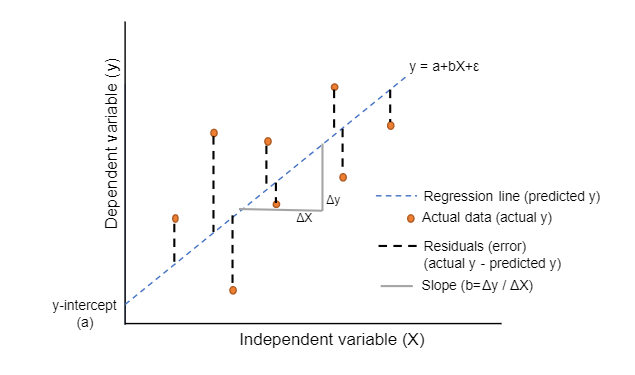